In [1]:
import numpy as np
from netCDF4 import Dataset as netcdf
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
fn = '/disk2/yhy/Research/ECP/SCM/IOP/TOGA_COARE_6hr_scm.nc'
fid = netcdf(fn, 'r')
lev = fid.variables['lev'][:]
lev

array([  2500.,   5000.,   7500.,  10000.,  12500.,  15000.,  17500.,
        20000.,  22500.,  25000.,  27500.,  30000.,  32500.,  35000.,
        37500.,  40000.,  42500.,  45000.,  47500.,  50000.,  52500.,
        55000.,  57500.,  60000.,  62500.,  65000.,  67500.,  70000.,
        72500.,  75000.,  77500.,  80000.,  82500.,  85000.,  87500.,
        90000.,  92500.,  95000.,  97500., 100000.], dtype=float32)

In [3]:
tb = {'ps':fid.variables['Ps'][:,0,0]/100.0, 'ts':fid.variables['Tsair'][:,0,0]-273.15, 
      'prec':fid.variables['Prec'][:,0,0]*86400*1000.0, 'qs':fid.variables['qsrf'][:,0,0]*1000, 
      'us':fid.variables['usrf'][:,0,0], 'vs':fid.variables['vsrf'][:,0,0], 
      'lhf':fid.variables['lhflx'][:,0,0], 'shf':fid.variables['shflx'][:,0,0], 
      'winds':fid.variables['windsrf'][:,0,0] }
tb = pd.DataFrame(tb)
tb.head(5)

,lhf,prec,ps,qs,shf,ts,us,vs,winds
0,139.562027,10.880352,1005.200012,17.769312,8.297759,27.720398,-1.688498,-3.554286,3.934968
1,143.774811,12.069388,1008.500000,17.764132,9.668620,27.467499,-2.508322,-4.881404,5.488149
2,145.714539,5.800757,1006.099976,17.556606,5.182578,27.941589,-2.388705,-4.562050,5.149584
3,167.201141,4.202634,1008.099976,17.293461,2.612850,28.678589,-2.379830,-4.511113,5.100366
4,155.434265,4.982342,1005.599976,17.634312,5.149265,28.180145,-1.756594,-4.596083,4.920325


In [4]:
tb['label'] = 0
tb.loc[tb['prec'] > 20, 'label'] = 1
tb.loc[195:205,:]

,lhf,prec,ps,qs,shf,ts,us,vs,winds,label
195,163.484344,11.487156,1009.200012,18.136005,3.676066,28.743744,-4.453161,2.218433,4.975147,0
196,137.801010,21.954446,1005.799988,18.036098,6.041430,28.387665,-5.162676,2.483150,5.728810,1
197,149.413269,37.409817,1008.700012,18.004749,13.109730,27.675659,-5.215098,2.893526,5.964037,1
198,150.738556,22.782573,1006.599976,17.975185,14.357501,27.366730,-4.637595,1.654541,4.923901,1
199,143.508759,23.377072,1009.599976,17.890781,14.553181,27.111877,-3.606912,1.564486,3.931594,1
200,193.122406,34.913207,1006.400024,17.880302,19.372381,27.191559,-6.713649,2.375027,7.121365,1
201,184.141632,32.329291,1009.000000,17.990410,16.635376,27.352020,-6.451093,3.222961,7.211385,1
202,206.563965,25.754457,1005.900024,18.031715,14.223768,27.608765,-7.099800,2.698585,7.595362,1
203,234.415924,18.558306,1008.200012,18.057888,17.290186,27.636078,-9.149927,2.181930,9.406487,0
204,213.051804,25.381969,1005.000000,18.065985,22.471931,27.199158,-8.710060,1.674976,8.869650,1


In [5]:
def plot2var(tb, vars, cstr={0:'b.', 1:'ro'}):
    for k in cstr.keys():
        plt.plot(tb.loc[tb['label']==k, vars[0]], tb.loc[tb['label']==k, vars[1]], cstr[k])
    return

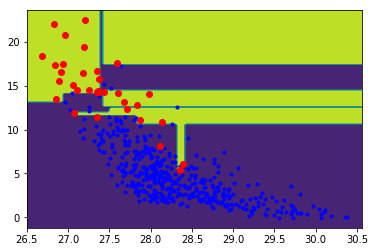

In [6]:
vars = ['ts', 'shf']
#vars = ['ps', 'lhf']
clf = DecisionTreeClassifier(min_samples_leaf = 1, class_weight='balanced')
clf.fit(np.array(tb[vars]), np.array(tb['label']))
plot2var(tb, vars)

xx, yy = np.meshgrid( np.linspace(plt.xlim()[0], plt.xlim()[1], 100), 
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100) ) 

zz = np.c_[ np.ravel(xx), np.ravel(yy) ]
zpred = clf.predict(zz).reshape(xx.shape)

plt.contourf(xx, yy, zpred, 4)


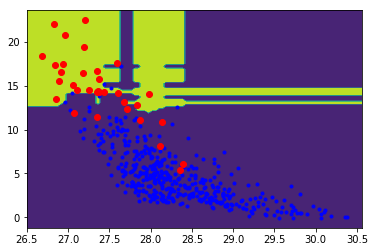

In [7]:
vars = ['ts', 'shf']

clf = RandomForestClassifier(n_estimators = 20, max_features = 'auto', 
                             min_samples_split=2, class_weight=None, max_depth=3)
clf.fit(np.array(tb[vars]), np.array(tb['label']))
plot2var(tb, vars)

xx, yy = np.meshgrid( np.linspace(plt.xlim()[0], plt.xlim()[1], 100), 
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100) ) 

zz = np.c_[ np.ravel(xx), np.ravel(yy) ]
zpred = clf.predict(zz).reshape(xx.shape)

plt.contourf(xx, yy, zpred, 4)


1 33 33
2 33 18
3 33 33
4 33 28
5 33 28
6 33 28
7 33 32
8 33 30
9 33 34
10 33 33
11 33 34
12 33 32
13 33 33
14 33 33
15 33 32
16 33 31
17 33 33
18 33 32
19 33 33
20 33 33
21 33 33
22 33 33
23 33 32
24 33 33
25 33 33
26 33 32
27 33 32
28 33 32
29 33 33
30 33 33
31 33 30
32 33 33
33 33 33
34 33 33
35 33 33
36 33 33
37 33 33
38 33 33
39 33 33
40 33 33
41 33 31
42 33 32
43 33 33
44 33 33
45 33 33
46 33 32
47 33 33
48 33 33
49 33 33
50 33 32
51 33 33
52 33 33
53 33 33
54 33 33
55 33 33
56 33 33
57 33 33
58 33 33
59 33 33
60 33 33
61 33 33
62 33 33
63 33 33
64 33 33
65 33 33
66 33 33
67 33 33
68 33 33
69 33 33
70 33 33
71 33 33
72 33 33
73 33 33
74 33 33
75 33 33
76 33 33
77 33 33
78 33 33
79 33 33
80 33 33
81 33 33
82 33 33
83 33 33
84 33 33
85 33 33
86 33 33
87 33 33
88 33 33
89 33 33
90 33 33
91 33 33
92 33 33
93 33 33
94 33 33
95 33 33
96 33 32
97 33 33
98 33 33
99 33 33


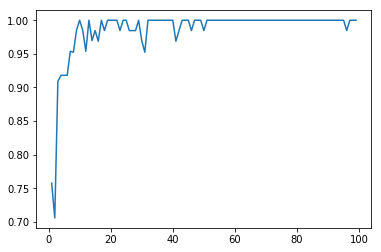

In [12]:

ntree = np.arange(1,100)
f1 = np.zeros([len(ntree)])

for i in range(len(ntree)):
    
    vars = ['ts', 'ps', 'shf', 'lhf', 'winds', 'us', 'vs', 'qs']
    clf = RandomForestClassifier(n_estimators = ntree[i], max_features = 'auto', 
                                 min_samples_split=2, max_depth=8, class_weight='balanced')
    clf.fit(np.array(tb[vars]), np.array(tb['label']))

    #print(dict(zip(vars, clf.feature_importances_)))
    ypred = clf.predict(np.array(tb[vars]))

    print(ntree[i], sum(tb['label']==1), sum(ypred==1) )

    TP = sum( (np.array(tb['label'])==1) & (ypred==1) )
    FN = sum( (np.array(tb['label'])==1) & (ypred==0) )
    FP = sum( (np.array(tb['label'])==0) & (ypred==1) )
    TN = sum( (np.array(tb['label'])==0) & (ypred==0) )
    
    f1[i] = sklearn.metrics.f1_score(np.array(tb['label']), ypred )

#print(TP, FN)
#print(FP, TN)

#plt.bar( range(len(vars)), clf.feature_importances_ )
#plt.xticks( range(len(vars)), vars )
#plt.show()

plt.plot(ntree, f1)

In [14]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print(FP/(FP+TN))
print(accuracy, precision, recall, 2*precision*recall/(precision+recall))

print( sklearn.metrics.confusion_matrix(np.array(tb['label']), ypred) )
print( sklearn.metrics.f1_score(np.array(tb['label']), ypred ) )



0.0044943820224719105
0.99581589958159 0.9428571428571428 1.0 0.9705882352941176
[[443   2]
 [  0  33]]
0.9705882352941176


[0.         0.         0.00449438 0.00449438 0.00674157 0.00674157
 0.00898876 0.00898876 0.01348315 0.01348315 0.06741573 0.08089888
 0.09662921 0.10337079 0.11011236 0.11685393 0.15730337 0.16179775
 0.18426966 0.19325843 0.19775281 0.20224719 0.21123596 0.21573034
 0.23370787 0.23820225 0.24269663 0.2494382  0.25393258 0.25842697
 0.26292135 0.26741573 0.26966292 0.27640449 0.27865169 0.28764045
 0.29438202 0.30337079 0.31011236 0.31910112 0.32134831 0.32808989
 0.33258427 0.34831461 0.35280899 0.37303371 0.38651685 0.39325843
 0.40449438 0.41797753 0.42247191 0.43146067 0.4494382  0.45393258
 0.46292135 0.67865169 0.68539326 0.99550562 1.        ] [0.03030303 0.87878788 0.87878788 0.90909091 0.90909091 0.93939394
 0.93939394 0.96969697 0.96969697 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1. 

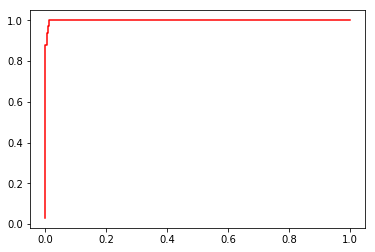

In [225]:
ypred = clf.predict_proba(np.array(tb[vars]))
#print(ypred)
fpr, tpr, thre = sklearn.metrics.roc_curve(np.array(tb['label']), ypred[:,1], 
                   pos_label=1, drop_intermediate = True)
print(fpr, tpr, thre)
plt.plot(fpr, tpr, 'r-')
